В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [3]:
data_path = '../M4/yulu_rental.csv'
df = pd.read_csv(data_path)

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [4]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

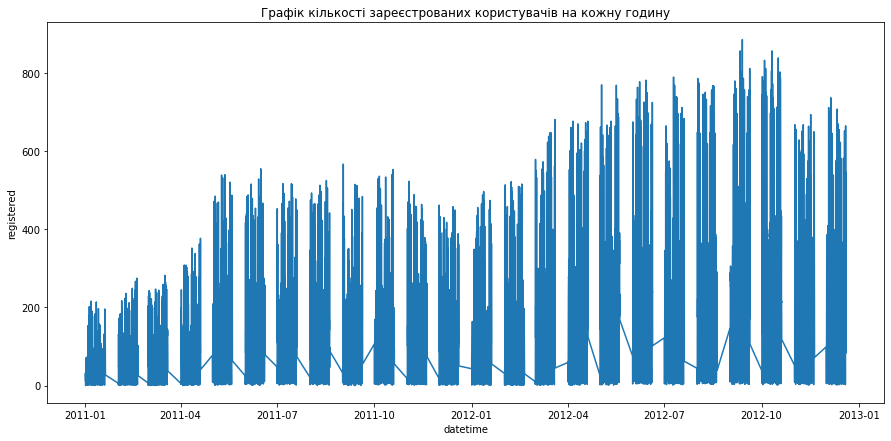

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(df.datetime, df.registered)
plt.title('Графік кількості зареєстрованих користувачів на кожну годину')
plt.xlabel('datetime')
plt.ylabel('registered');

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [9]:
df['date'] = df.datetime.dt.date

In [13]:
df_registered_by_date = df.groupby(['date'], as_index=False)['registered'].sum()
df_registered_by_date.head()

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

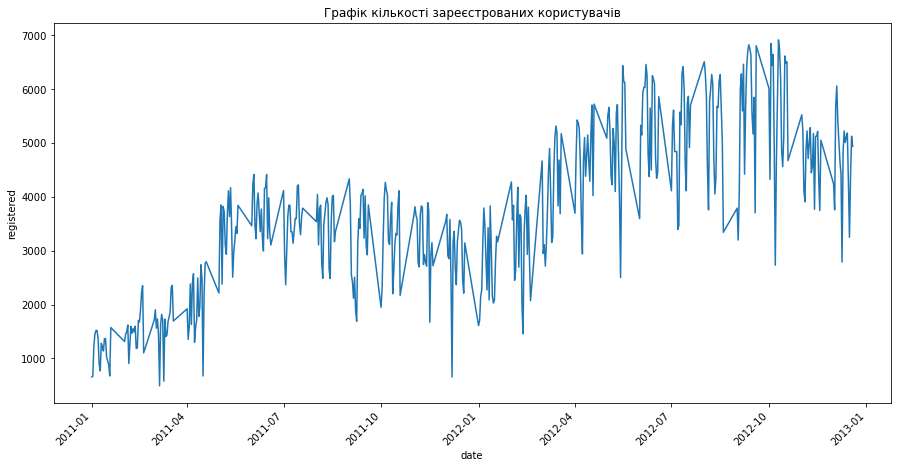

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(df_registered_by_date.date, df_registered_by_date.registered)
plt.title('Графік кількості зареєстрованих користувачів')
plt.xlabel('date')
plt.ylabel('registered')
plt.xticks(rotation=45, ha='right');

Висновки: 
1. Тренд по рокам - загалом графік показує, що к-сть зареєстрованих щорічно збільшується тобто є висхідний тренд на ріст популярності послуги

2. Тренд по сезонам - графік показує, що висхідний ріст на послугу з'являється з січня і триває орієнтовно до травня-червня, далі у період літо-осінь (червень-жовтень) попит на послугу стабілізується і тримається на фіксованому рівні, а з жовтня до січня йде тренд на зниження к-сті користувачів (пік максимально низького попиту припадає орієнтовно на грудень-січень і теоретично пов'язаний з зимовими святами, якщо вони є у даній країні). Це поверхневий висновок, що можна закріпити подальшим розгорнутим аналізом для компанії.
Оскільки річ йде про відкритий вид транспорту, то фактична сезонність підтверджує факт того, що послуга найбільш потрібна у найтепліший період року (червень-жовтень), коли погода жарка і так зручно пересуватися. Відповідно у холодний період (листопад-січень), коли ймовірно погода в Індії також псується (низька температура повітря, дощі, вітри), таке пересування менш зручне і не затишне порівнято з закритим транспортом.

3. Якщо компанія гіпотетично звернулася до нас саме в грудні 2012 (останній період даних згідно даних), то можна було б припустити, що зниження доходу пов'язано з сезонним зниженням попиту і компанія прогнозовано має побачити приріст вже з лютого 2023.

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

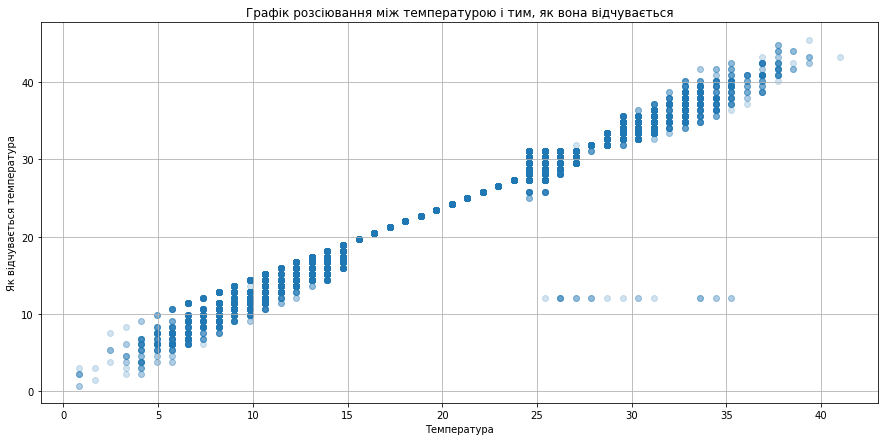

In [14]:
col_x = 'temp'
col_y = 'atemp'

plt.figure(figsize=(15,7))
plt.scatter(df[col_x], df[col_y], alpha=0.2)
plt.title('Графік розсіювання між температурою і тим, як вона відчувається')
plt.xlabel('Температура')
plt.ylabel('Як відчувається температура')
plt.grid(True);

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


Висновки:
1. Графік показує та підтверджує явну позитивну лінійну залежність між показниками `Температура` та `Як відчувається температура`, що в цілому випливає з суті самих показників.
2. Графік показує наявність в даних кількох викидів (11 точок в ряд поза областю основного графіку), які можна додатково перевірити і виключити за потреби (можливо сформовані не коректно, оскільки є явний загальний тренд).
3. Ширина розсіювання показників має певну особливість:
- до 15 градусів та вище 25 градусів є певне фіксоване розсіювання в сприйнятті температури респондентами - респонденти оцінюють температуру приблизно вище на +5 градусів (наприклад, 10 градусів сприймається як 10-15 градусів і так далі);
- в інтервалі 15-25 градусів респонденти демонструють чітку відповідність між фактичною температурою і температурою сприйняття (графік візуально перетворюється в лінію без "тунелю розсіювання")